### **Sales Prediction Using Linear Regression**
**By: Heroshi Joe Abejuela** (Codsoft Data Science Intern)

#### **Introduction**
In this project, we explore the application of linear regression to predict sales based on advertising expenditures across different media channels. Linear regression serves as a powerful statistical tool that enables us to establish relationships between variables and make informed predictions.

#### **Problem**
The primary goal is to predict the sales of a product using data on advertising expenditures for TV, radio, and newspapers. By analyzing this data, we aim to understand how different advertising investments impact sales performance.

#### **Solution**
I employed a linear regression model to establish the relationship between advertising expenditures and sales. The model is defined mathematically as follows:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n + \epsilon
$$

Where:
- $Y$ = Dependent variable (Sales)
- $\beta_0$ = Intercept
- $beta_1, beta_2, \ldots, beta_n$ = Coefficients for each independent variable
- $X_1, X_2, \ldots, X_n$ = Independent variables (e.g., advertising expenditures)
- $\epsilon \$ = Error term

#### **Results**
The following table summarizes the performance of the top models trained on data:

| The Model           | ACTUAL RESULTS:                                     |
|---------------------|-----------------------------------------------------|
| Model: LinearRegression() | Mean Squared Error: 2.9077569102710896       |
|                     | R-squared: 0.9059011844150826                      |
|                     | Coefficients:                                      |
|                     | TV: 0.054509                                       |
|                     | Radio: 0.100945                                    |
|                     | Newspaper: 0.004337                                |

The results indicate that our linear regression model explains a significant portion of the variance in sales, with an $R^2$ value of approximately $0.906$. The coefficients suggest that an additional unit of expenditure on TV, radio, and newspaper advertising is expected to increase sales by about $0.0545$, $0.1009$, and $0.0043$ units, respectively.

In [7]:
# Standard library imports
import os
import shutil
import warnings

# Related third party imports
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Supress Warnings
warnings.filterwarnings('ignore')

# Download dataset
ashydv_advertising_dataset_path = kagglehub.dataset_download('ashydv/advertising-dataset')

# Load and display data
# The 'advertising.csv' file is likely inside the downloaded dataset directory.
# Use os.path.join to construct the full path to the file.
advertising_file_path = os.path.join(ashydv_advertising_dataset_path, 'advertising.csv')
advertising = pd.DataFrame(pd.read_csv(advertising_file_path))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
advertising.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


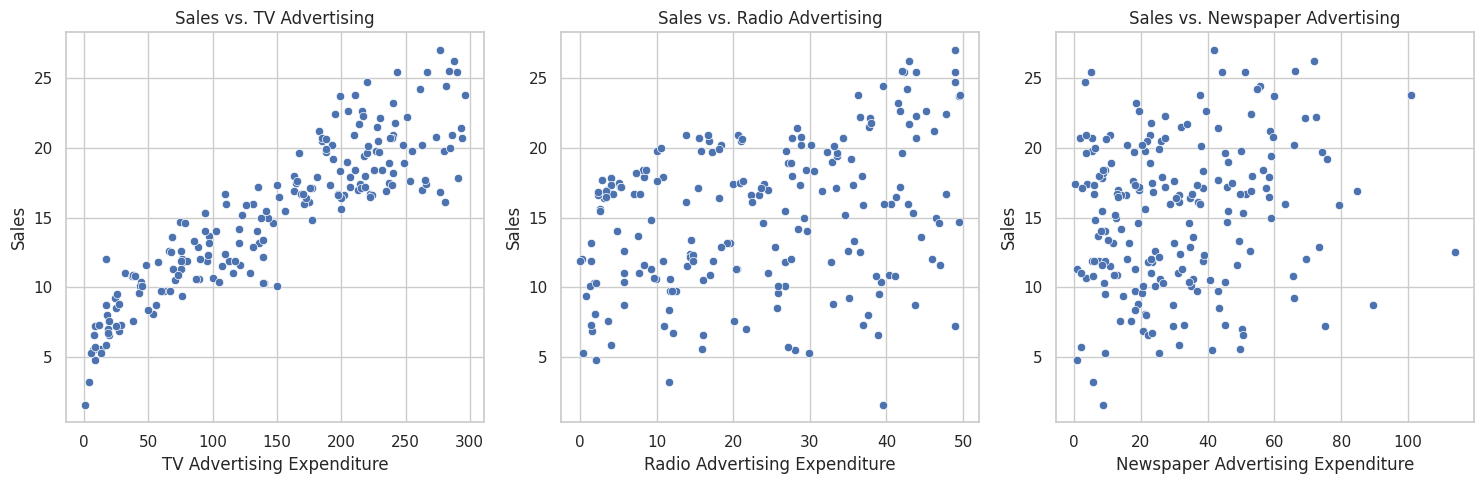

In [10]:
df = advertising.copy()

# Set the aesthetics for the plots
sns.set(style='whitegrid')

# Create scatter plots for each advertising medium against sales
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('Sales vs. TV Advertising')
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title('Sales vs. Radio Advertising')
plt.xlabel('Radio Advertising Expenditure')
plt.ylabel('Sales')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title('Sales vs. Newspaper Advertising')
plt.xlabel('Newspaper Advertising Expenditure')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

In [11]:
# Prepare the data
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict sales on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826


In [12]:
# Display model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

           Coefficient
TV            0.054509
Radio         0.100945
Newspaper     0.004337


### **The Mathematics Behind The Prediction**

### 1. **Linear Regression Model**

At its core, linear regression is a method for modeling the relationship between one or more independent variables (features) and a dependent variable (target). The model assumes that the relationship can be approximated by a linear equation:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n + \epsilon
$$

Where:
- $Y$ = Dependent variable (Sales)
- $beta_0$= Intercept (the value of $Y$ when all $X$ are zero)
- $beta_1, beta_2, \ldots, beta_n$ = Coefficients for each independent variable (features)
- $X_1, X_2, \ldots, X_n$ = Independent variables (e.g., TV, Radio, Newspaper advertising expenditures)
- $\\epsilon\$ = Error term (the difference between the predicted and actual values)

### 2. **Coefficients Interpretation**

The coefficients $\\beta\$ represent the change in the dependent variable (sales) for a one-unit change in the corresponding independent variable, holding all other variables constant:

- **TV Coefficient (0.0545)**: For every additional unit of expenditure on TV advertising, sales increase by approximately 0.0545 units.
- **Radio Coefficient (0.1009)**: For every additional unit of expenditure on Radio advertising, sales increase by approximately 0.1009 units.
- **Newspaper Coefficient (0.0043)**: For every additional unit of expenditure on Newspaper advertising, sales increase by approximately 0.0043 units.

### 3. **Model Evaluation Metrics**

#### a. **Mean Squared Error (MSE)**

MSE is a measure of the average of the squares of the errors, which are the differences between predicted and actual values. Mathematically, it is defined as:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y_i})^2
$$

Where:
- $Y_i$ = Actual sales values
- $\hat{Y_i}$ = Predicted sales values
- $n$ = Number of observations

A lower MSE indicates better model performance, as it means that the predictions are closer to the actual values.

#### b. **R-squared (\$R^2$)**

R-squared is a statistical measure that represents the proportion of the variance for the dependent variable that's explained by the independent variables in the model. It is calculated as:

$$
R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
$$

Where:
- $\text{SS}_{\text{res}} = \sum (Y_i - \hat{Y_i})^2$ (Residual sum of squares)
- $\text{SS}_{\text{tot}} = \sum (Y_i - \bar{Y})^2$ (Total sum of squares, where $\bar{Y}$ is the mean of the actual values)

An $R^2$ value of 1 indicates that the model perfectly explains all the variability of the response data around its mean, while an $R^2$ value of 0 indicates that the model does not explain any variability.

### 4. **Zero Null Values**

Having zero null values means that your dataset is complete and does not have any missing entries, which simplifies the analysis since there’s no need for imputation or removal of data points. This is crucial for ensuring the reliability and validity of the model's results.

### Summary

The mathematics of linear regression helps to quantify relationships between variables, providing a clear framework for making predictions based on historical data. By evaluating the model using metrics like MSE and $R^2$, you can assess its effectiveness and reliability in predicting sales based on advertising expenditures.

### **More Projects and Contact Information**

For more details on my projects and work, please visit my [GitHub profile](https://github.com/HiroshiJoe). You can also connect with me on [LinkedIn](https://www.linkedin.com/in/heroshi-joe-abejuela-513413314/) for professional updates and networking.

Feel free to reach out if you have any questions or would like to discuss potential collaborations!